In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#%matplotlib notebook
import os
import math as m
lines=127
qual=800

3.1.3


* The axis names in the serial input file are not equal to the ones defined below. This is corrected throughout the notebook:
  * df['Bx'],label='Y'
  * df['By'],label='X'
* Below is the coordinate system called 'MA-KOS' :

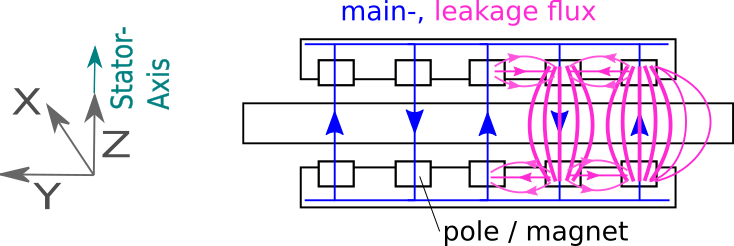

In [2]:
from IPython.display import Image
Image(filename='./Streufluss_en1.png') 

In [3]:
file="../measurement_data/StrayField/GY-271/Hall_20210310_175224_gerade.csv"
df_gerade=pd.read_csv(file,sep=";")
file="../measurement_data/StrayField/GY-271/Hall_20210310_175808_1Grad.csv"
df_schief=pd.read_csv(file,sep=";")

In [4]:
#Kalibrierung
ArduinoIntegerRange_pos=(2**15)-1
GY271Range_pos=800.0 #uT = 8G
arduino_koeff=GY271Range_pos/ArduinoIntegerRange_pos
for df in [df_gerade,df_schief]:
    for o in ['Bx','By','Bz']:
        df[o]=arduino_koeff*df[o]

In [5]:
unixtime_0=df_gerade.loc[0,'unixtime']
for df in [df_gerade,df_schief]:
    df['time1']=df['unixtime']-unixtime_0

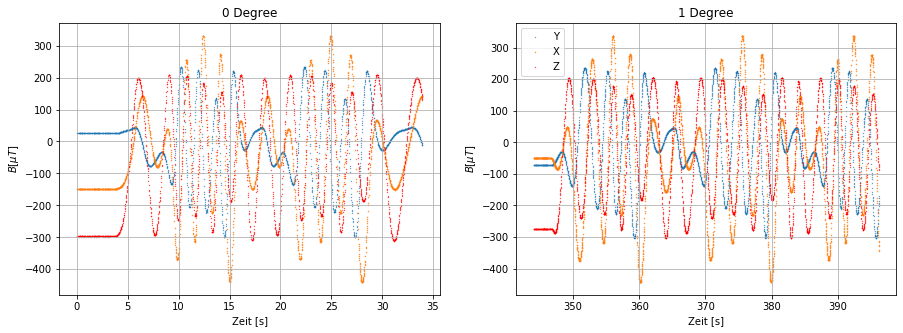

In [6]:
# MA KOS
fig, axo = plt.subplots(1, 2,figsize=(15,5))
for (ax,df,tt) in zip(axo,[df_gerade,df_schief],['0 Degree','1 Degree']):
    ax.scatter(df['time1'],df['Bx'],label='Y',s=0.1)
    ax.scatter(df['time1'],df['By'],label='X',s=0.2)
    ax.scatter(df['time1'],df['Bz'],label='Z',color='red',s=0.1)
    ax.grid(True)
    ax.set_xlabel('Zeit [s]')
    ax.set_ylabel(r'$B$'+ r'$[\mu T]$')
    ax.title.set_text(tt)
plt.legend()
plt.savefig("20210310_1D_Hall_alle_KOS_MA.svg",dpi=qual)
plt.show()

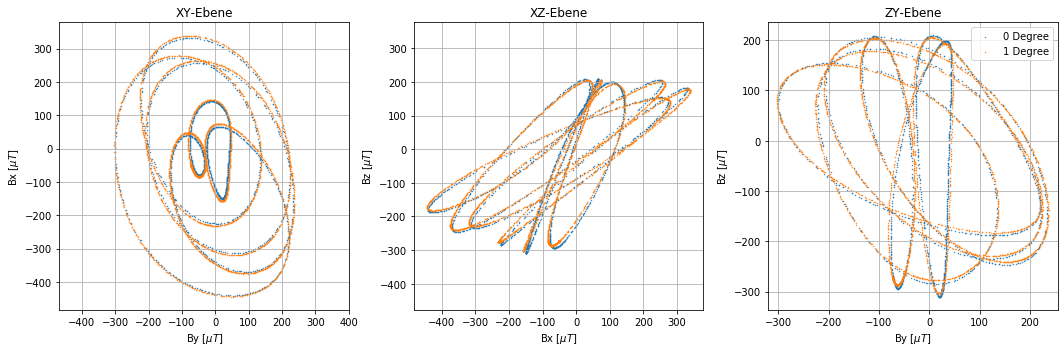

In [7]:
# MA KOS

title=['XY','XZ','ZY']
fig, axo = plt.subplots(1, 3,figsize=(15,5))
axis=[['Bx','By'],['By','Bz'],['Bx','Bz']]
axis_label=[['By','Bx'],['Bx','Bz'],['By','Bz']]
for (ax,[x,y],tt,[x_label,y_label]) in zip(axo,axis,title,axis_label):
    fig.tight_layout()
    df=df_gerade
    ax.scatter(df[x],df[y],label='0 Degree',s=0.2)
    df=df_schief
    ax.scatter(df[x],df[y],label='1 Degree',s=0.2)
    #ax.xaxis.set_ticks([])
    #plt.xlim(4,17)
    ax.grid(True)
    #plt.title(r'$B_Z$ [ $\mu T$ ] in Rotornähe während einer Umdrehung')
    ax.title.set_text(tt+'-Ebene')
    ax.set_xlabel(x_label+ r' $[\mu T]$')
    ax.set_ylabel(y_label+ r' $[\mu T]$')
    #ax.legend()
    ax.set_aspect('equal', adjustable="datalim")
ax.legend(loc = 'upper right')
plt.savefig("20210310_2D_Hall_alle_KOS_MA.svg",dpi=qual)
plt.show()

# Triangular approach to calculate the angle of inclination

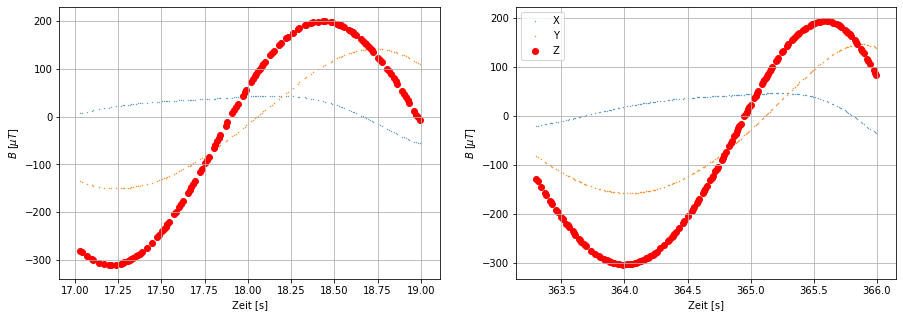

In [8]:
filter_gerade=(df_gerade['time1']>17) & (df_gerade['time1']<19)
filter_schief=(df_schief['time1']>363.3) & (df_schief['time1']<366)
fig, axo = plt.subplots(1, 2,figsize=(15,5))
for (ax,df) in zip(axo,[df_gerade.loc[filter_gerade],df_schief.loc[filter_schief]]):
    ax.scatter(df['time1'],df['Bx'],label='X',s=0.1)
    ax.scatter(df['time1'],df['By'],label='Y',s=0.2)
    ax.scatter(df['time1'],df['Bz'],label='Z',color='red')
    ax.grid(True)
    ax.set_xlabel('Zeit [s]')
    ax.set_ylabel(r'$B$ '+ r'$[\mu T]$')
    #ax.set_ylim(-10*10**3,-13*10**3)
plt.legend()
plt.show()

In [9]:
#Min/Max Punkte
Gerade_min=df_gerade.loc[df_gerade.loc[filter_gerade,'Bz'].idxmin()]
Gerade_max=df_gerade.loc[df_gerade.loc[filter_gerade,'Bz'].idxmax()]
Schief_min=df_schief.loc[df_schief.loc[filter_schief,'Bz'].idxmin()]
Schief_max=df_schief.loc[df_schief.loc[filter_schief,'Bz'].idxmax()]

In [10]:
alpha_Gmin=m.atan(Gerade_min['Bx']/Gerade_min['Bz'])*180/m.pi
alpha_Smin=m.atan(Schief_min['Bx']/Schief_min['Bz'])*180/m.pi
alpha_Smin-alpha_Gmin

0.2151991683762975

In [11]:
alpha_Gmax=m.atan(Gerade_max['Bx']/Gerade_max['Bz'])*180/m.pi
alpha_Smax=m.atan(Schief_max['Bx']/Schief_max['Bz'])*180/m.pi
alpha_Smax-alpha_Gmax

0.5585941816988029

# Calculation of the true inclination angle of the sensor
* The values were measured with a ruler by hand

In [12]:
import math as m

In [13]:
m.tan(1*m.pi/180)*60

1.0473038956930552

# 3D plot

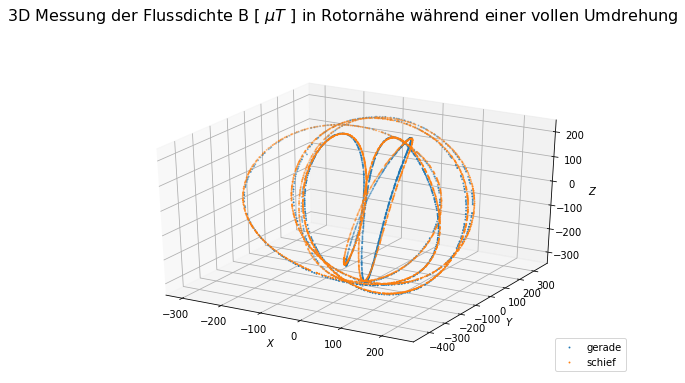

In [14]:
lw1=0.8
fig = plt.figure(figsize=(10,6))
ax= fig.add_subplot(projection='3d')
ax.scatter3D(df_gerade['Bx'],df_gerade['By'],df_gerade['Bz'],label='gerade',s=lw1)
ax.scatter3D(df_schief['Bx'],df_schief['By'],df_schief['Bz'],label='schief',s=lw1)
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')
ax.dist = 11
#plt.tight_layout(pad=0.2, w_pad=1.0, h_pad=1.0)
plt.legend(loc='lower right')
fig.suptitle(r'3D Messung der Flussdichte B [ $\mu T$ ] in Rotornähe während einer vollen Umdrehung', fontsize=16)
#plt.savefig("3D.png",dpi=qual)
plt.show()